# Snow2School Data Analysis

This notebook is an example of how to analyze data with the programming language Python.

First you need to import temperature data from a file, then this data is plotted in a figure.

## Import data from a file

In [ ]:
# ## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ## Load Data from CSV
# Specify the path to your CSV file
csv_file_path = 'data/tempdata.csv'

# Load the CSV file into this notebook...
df = pd.read_csv(csv_file_path)

## Plot some lines of the imported data

In [ ]:
# ## Data Inspection and Preparation
# Print the first few rows of the DataFrame to understand its structure
print("First few rows of the data:")
print(df.head())
print("\n")

# Merge Date and Time into a single DateTime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d.%m.%Y %H:%M:%S")

First few rows of the data:
         Date  Temperature
0  2024-01-01        -14.6
1  2024-01-02        -20.8
2  2024-01-03        -14.6
3  2024-01-04        -17.2
4  2024-01-05         -9.6




## Plot the data

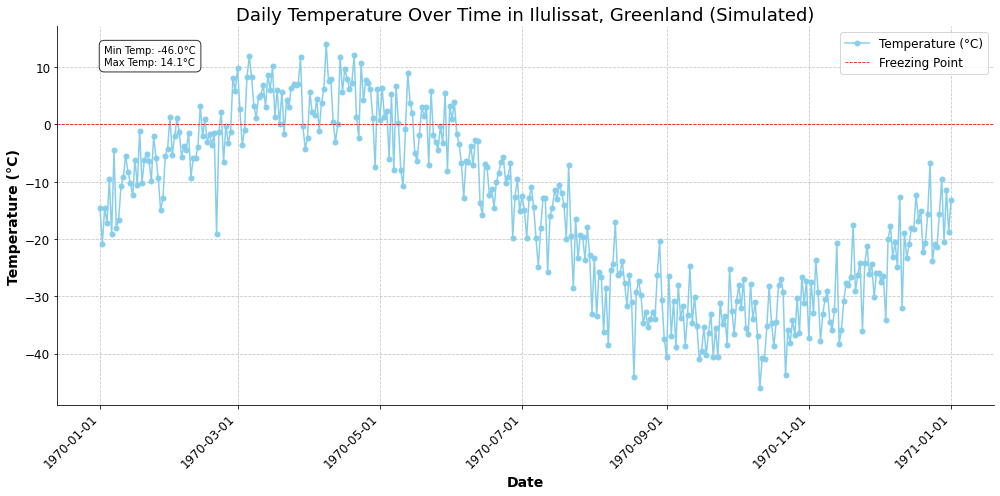

In [ ]:
# ## Enhanced Plotting
# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the temperature data against the date
ax.plot(df['Datetime'], df['Temperature'], marker='o', linestyle='-', color='skyblue', linewidth=1.5, markersize=5, label='Temperature [°C]')

# Set the title of the plot with a larger font size
ax.set_title('Daily Temperature in Uummannaq', fontsize=18)

# Set more descriptive and styled labels for the x and y axes
ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature [°C]', fontsize=14, fontweight='bold')

# Add a legend with a larger font size
ax.legend(fontsize=12)

# Format the x-axis to display dates nicely
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
date_format = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Improve tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Add horizontal line at 0 degrees Celsius for reference
ax.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Freezing Point')
ax.legend(fontsize=12) # Ensure the freezing point legend is also displayed

# Add a text annotation...
if not df['Temperature'].empty:
    min_temp = df['Temperature'].min()
    max_temp = df['Temperature'].max()
    ax.text(0.05, 0.95, f'Min Temp: {min_temp}°C\nMax Temp: {max_temp}°C',
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Remove top and right spines for a cleaner look (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot with tight layout
plt.tight_layout()
plt.show()